# **1. Data Loading and Initial Exploration**


In [196]:
pip install pymongo


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [197]:
import pandas as pd
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")  # Local connection address
db = client["procurement_db"]  # Database name
collection = db["purchases"]  # Collection name



In [198]:
from pymongo import MongoClient

try:
    # Connect to MongoDB
    client = MongoClient("mongodb://localhost:27017/")
    # Test connection
    client.admin.command('ping')
    print("Active connection to MongoDB completed.")
except Exception as e:
    print(f"ERROR: {e}")


Active connection to MongoDB completed.


In [199]:
# Fetch data and convert it into a DataFrame
cursor = collection.find()
df = pd.DataFrame(list(cursor))

# Ensure 'Creation Date' is parsed as datetime
df['Creation Date'] = pd.to_datetime(df['Creation Date'], errors='coerce')

# Display the first few rows
df.head()


,_id,Creation Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,...,Location,Normalized UNSPSC,Purchase Date,Quarter,Segment,Segment Title,Sub-Acquisition Method,Sub-Acquisition Type,Supplier Qualifications,Supplier Zip Code
0,673b52057b9bc04583454d8f,2013-08-27,2013-2014,7-12-70-26,REQ0011118,REQ0011118,IT Goods,WSCA/Coop,"Consumer Affairs, Department of",1740272.0,...,"95691\n(38.575311, -121.560401)",4.932197e+07,07/01/2014,2013Q3,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95691
1,673b52057b9bc04583454d90,2014-01-29,2013-2014,7-11-51-02,REQ0011932,REQ0011932,NON-IT Goods,Informal Competitive,"Consumer Affairs, Department of",1760085.0,...,"95691\n(38.575311, -121.560401)",7.612150e+07,07/01/2014,2014Q1,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95691
2,673b52057b9bc04583454d91,2013-11-01,2013-2014,7-11-51-02,REQ0011476,REQ0011476,IT Services,Informal Competitive,"Consumer Affairs, Department of",17224.0,...,"95841\n(38.662263, -121.346136)",4.932197e+07,07/01/2014,2013Q4,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95841
3,673b52057b9bc04583454d92,2014-06-13,2013-2014,7-11-51-02,4500236642,REQ0008872,NON-IT Goods,Informal Competitive,Correctional Health Care Services,1754462.0,...,"91436\n(34.151642, -118.49051)",4.932197e+07,06/05/2014,2014Q2,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,91436
4,673b52057b9bc04583454d93,2014-03-12,2013-2014,1-10-75-60A,4500221028,REQ0008872,NON-IT Goods,Statewide Contract,"Corrections and Rehabilitation, Department of",1087660.0,...,"95814\n(38.580427, -121.494396)",4.410313e+07,03/12/2014,2014Q1,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95814


In [200]:
# Display basic structure of the data
print("\nDataset information:")
print(df.info())  # Display data types and non-null values

print("\nSummary statistics:")
print(df.describe())  # Display summary statistics for numeric columns


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346018 entries, 0 to 346017
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   _id                      346018 non-null  object        
 1   Creation Date            346018 non-null  datetime64[ns]
 2   Fiscal Year              346018 non-null  object        
 3   LPA Number               346018 non-null  object        
 4   Purchase Order Number    346018 non-null  object        
 5   Requisition Number       346018 non-null  object        
 6   Acquisition Type         346018 non-null  object        
 7   Acquisition Method       346018 non-null  object        
 8   Department Name          346018 non-null  object        
 9   Supplier Code            346018 non-null  float64       
 10  Supplier Name            346018 non-null  object        
 11  CalCard                  346018 non-null  object        

# **2.Data Clean**


In [201]:
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;

%matplotlib inline

In [203]:
# create a fcuntion to find and display NAs
def count_NAs(dfna, perc):
    NaList = []
    numOfRows = len(dfna)
    for i in dfna.columns:
        numOfNAs = dfna[i].isna().sum()
        print(f'{i:<30}, Rows: {numOfRows:>5}, NAs: {numOfNAs:<25}, precentage: {round(numOfNAs/numOfRows * 100.00,2)}')
        if ((numOfNAs/numOfRows) * 100.000) >= perc:
           NaList.append(i)
    print(f'columns with NAs over {perc}%: {NaList}')
    return NaList
# Display NAs
cutoff = 40
NAs = count_NAs(df, cutoff)
print(f"Total with NAs over {cutoff}% column number :",len(NAs))

_id                           , Rows: 346018, NAs: 0                        , precentage: 0.0
Creation Date                 , Rows: 346018, NAs: 0                        , precentage: 0.0
Fiscal Year                   , Rows: 346018, NAs: 0                        , precentage: 0.0
LPA Number                    , Rows: 346018, NAs: 0                        , precentage: 0.0
Purchase Order Number         , Rows: 346018, NAs: 0                        , precentage: 0.0
Requisition Number            , Rows: 346018, NAs: 0                        , precentage: 0.0
Acquisition Type              , Rows: 346018, NAs: 0                        , precentage: 0.0
Acquisition Method            , Rows: 346018, NAs: 0                        , precentage: 0.0
Department Name               , Rows: 346018, NAs: 0                        , precentage: 0.0
Supplier Code                 , Rows: 346018, NAs: 0                        , precentage: 0.0
Supplier Name                 , Rows: 346018, NAs: 0        

In [204]:
# تعبئة القيم المفقودة بناءً على نوع البيانات
for column in df.columns:
    if df[column].dtype == 'object':  # إذا كان العمود نصيًا
        mode_value = df[column].mode()[0]  # الحصول على المنوال
        df[column].fillna(mode_value, inplace=True)
    else:  # إذا كان العمود رقميًا
        df[column].fillna(df[column].mean(), inplace=True)  # يمكنك استبدال mean بـ median إذا كنت تفضل ذلك

print(f"The length after filling NAs: {len(df)}")



The length after filling NAs: 346018


In [205]:
# create a fcuntion to find and display NAs
def count_NAs(dfna, perc):
    NaList = []
    numOfRows = len(dfna)
    for i in dfna.columns:
        numOfNAs = dfna[i].isna().sum()
        print(f'{i:<30}, Rows: {numOfRows:>5}, NAs: {numOfNAs:<25}, precentage: {round(numOfNAs/numOfRows * 100.00,2)}')
        if ((numOfNAs/numOfRows) * 100.000) >= perc:
           NaList.append(i)
    print(f'columns with NAs over {perc}%: {NaList}')
    return NaList
# Display NAs
cutoff = 40
NAs = count_NAs(df, cutoff)
print(f"Total with NAs over {cutoff}% column number :",len(NAs))

_id                           , Rows: 346018, NAs: 0                        , precentage: 0.0
Creation Date                 , Rows: 346018, NAs: 0                        , precentage: 0.0
Fiscal Year                   , Rows: 346018, NAs: 0                        , precentage: 0.0
LPA Number                    , Rows: 346018, NAs: 0                        , precentage: 0.0
Purchase Order Number         , Rows: 346018, NAs: 0                        , precentage: 0.0
Requisition Number            , Rows: 346018, NAs: 0                        , precentage: 0.0
Acquisition Type              , Rows: 346018, NAs: 0                        , precentage: 0.0
Acquisition Method            , Rows: 346018, NAs: 0                        , precentage: 0.0
Department Name               , Rows: 346018, NAs: 0                        , precentage: 0.0
Supplier Code                 , Rows: 346018, NAs: 0                        , precentage: 0.0
Supplier Name                 , Rows: 346018, NAs: 0        

In [206]:
df.head()

,_id,Creation Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,...,Location,Normalized UNSPSC,Purchase Date,Quarter,Segment,Segment Title,Sub-Acquisition Method,Sub-Acquisition Type,Supplier Qualifications,Supplier Zip Code
0,673b52057b9bc04583454d8f,2013-08-27,2013-2014,7-12-70-26,REQ0011118,REQ0011118,IT Goods,WSCA/Coop,"Consumer Affairs, Department of",1740272.0,...,"95691\n(38.575311, -121.560401)",4.932197e+07,07/01/2014,2013Q3,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95691
1,673b52057b9bc04583454d90,2014-01-29,2013-2014,7-11-51-02,REQ0011932,REQ0011932,NON-IT Goods,Informal Competitive,"Consumer Affairs, Department of",1760085.0,...,"95691\n(38.575311, -121.560401)",7.612150e+07,07/01/2014,2014Q1,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95691
2,673b52057b9bc04583454d91,2013-11-01,2013-2014,7-11-51-02,REQ0011476,REQ0011476,IT Services,Informal Competitive,"Consumer Affairs, Department of",17224.0,...,"95841\n(38.662263, -121.346136)",4.932197e+07,07/01/2014,2013Q4,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95841
3,673b52057b9bc04583454d92,2014-06-13,2013-2014,7-11-51-02,4500236642,REQ0008872,NON-IT Goods,Informal Competitive,Correctional Health Care Services,1754462.0,...,"91436\n(34.151642, -118.49051)",4.932197e+07,06/05/2014,2014Q2,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,91436
4,673b52057b9bc04583454d93,2014-03-12,2013-2014,1-10-75-60A,4500221028,REQ0008872,NON-IT Goods,Statewide Contract,"Corrections and Rehabilitation, Department of",1087660.0,...,"95814\n(38.580427, -121.494396)",4.410313e+07,03/12/2014,2014Q1,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95814


In [207]:
df.isnull().sum()

_id                        0
Creation Date              0
Fiscal Year                0
LPA Number                 0
Purchase Order Number      0
Requisition Number         0
Acquisition Type           0
Acquisition Method         0
Department Name            0
Supplier Code              0
Supplier Name              0
CalCard                    0
Item Name                  0
Item Description           0
Quantity                   0
Unit Price                 0
Total Price                0
Class                      0
Class Title                0
Classification Codes       0
Commodity Title            0
Creation Day               0
Creation Month             0
Creation Year              0
Family                     0
Family Title               0
Location                   0
Normalized UNSPSC          0
Purchase Date              0
Quarter                    0
Segment                    0
Segment Title              0
Sub-Acquisition Method     0
Sub-Acquisition Type       0
Supplier Quali

In [208]:
duplicates = df[df.duplicated()]
print(f"Number of duplicated rows: {duplicates.shape[0]}")


Number of duplicated rows: 0


In [209]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
_id                        0
Creation Date              0
Fiscal Year                0
LPA Number                 0
Purchase Order Number      0
Requisition Number         0
Acquisition Type           0
Acquisition Method         0
Department Name            0
Supplier Code              0
Supplier Name              0
CalCard                    0
Item Name                  0
Item Description           0
Quantity                   0
Unit Price                 0
Total Price                0
Class                      0
Class Title                0
Classification Codes       0
Commodity Title            0
Creation Day               0
Creation Month             0
Creation Year              0
Family                     0
Family Title               0
Location                   0
Normalized UNSPSC          0
Purchase Date              0
Quarter                    0
Segment                    0
Segment Title              0
Sub-Acquisition Method     0
Sub-Acquisition 

# 3.EDA

**Time Dependence of the Creation Date**

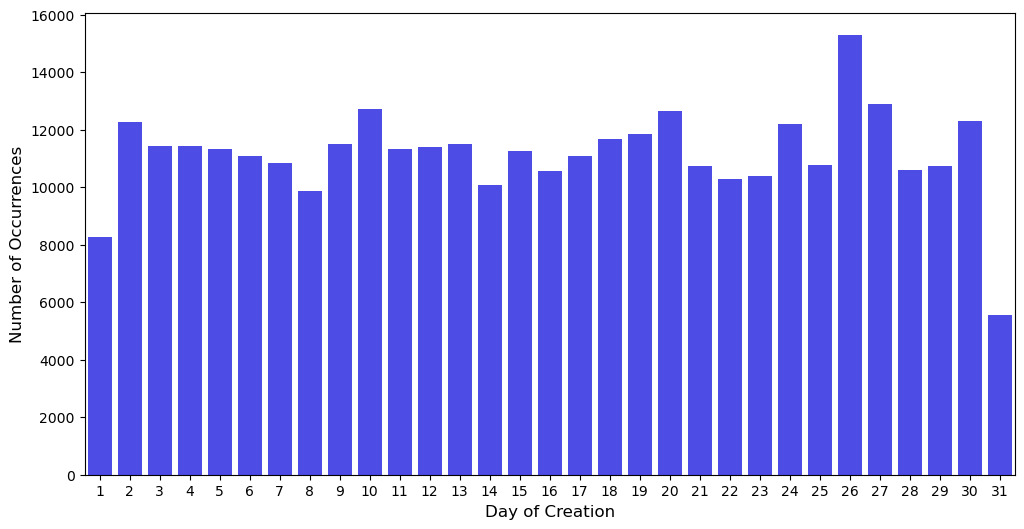

In [210]:
df['Creation Day'] = df['Creation Date'].dt.day

cnt_srs = df['Creation Day'].value_counts()
plt.figure(figsize=(12,6))

# Pass data as a single argument (cnt_srs) and specify x and y using keywords
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')  

#plt.xticks(rotation='vertical')
plt.xlabel('Day of Creation', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Purchases tend to be logged more or less evently throughout the month.

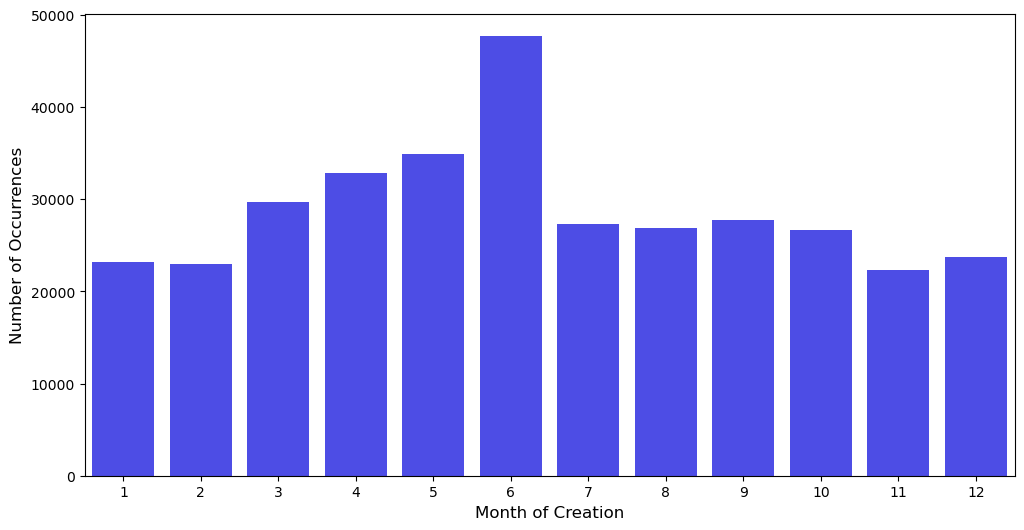

In [211]:
df['Creation Month'] = df['Creation Date'].dt.month

cnt_srs = df['Creation Month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')  
#plt.xticks(rotation='vertical')
plt.xlabel('Month of Creation', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Most of the entries are made in June.

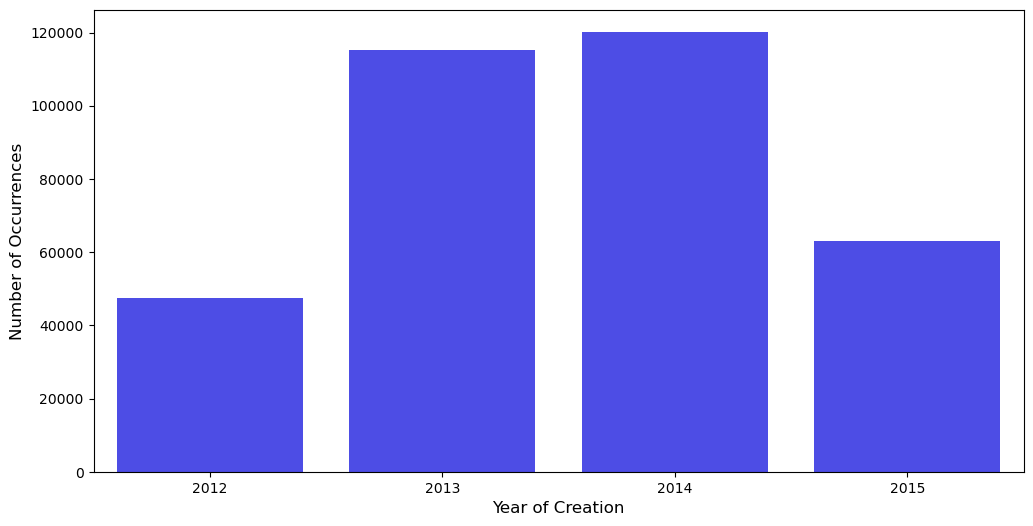

In [212]:
df['Creation Year'] = df['Creation Date'].dt.year

cnt_srs = df['Creation Year'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')  
#plt.xticks(rotation='vertical')
plt.xlabel('Year of Creation', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Time Dependence of Purchase Date

In [213]:
# there are some erroneous values in the year like 2510 and 1014, so we'll clean that up

temp_df = pd.DataFrame()

temp_df['Purchase Date'] = pd.to_datetime([date[:-4]+'20'+date[-2:] for date in df['Purchase Date'].dropna().values])

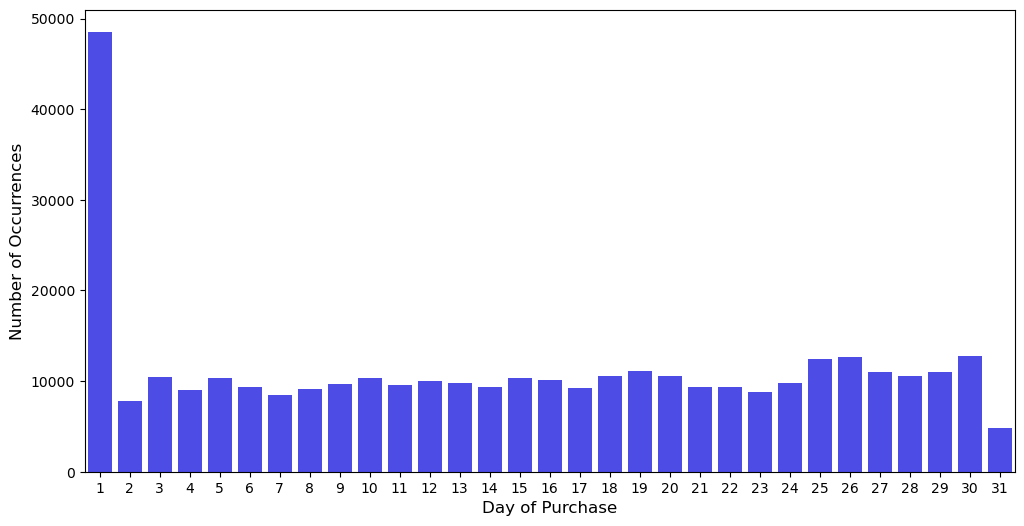

In [214]:
temp_df['Purchase Day'] = temp_df['Purchase Date'].dt.day

cnt_srs = temp_df['Purchase Day'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')  
#plt.xticks(rotation='vertical')
plt.xlabel('Day of Purchase', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Looks like things tend to get purchased on the first day of the month.

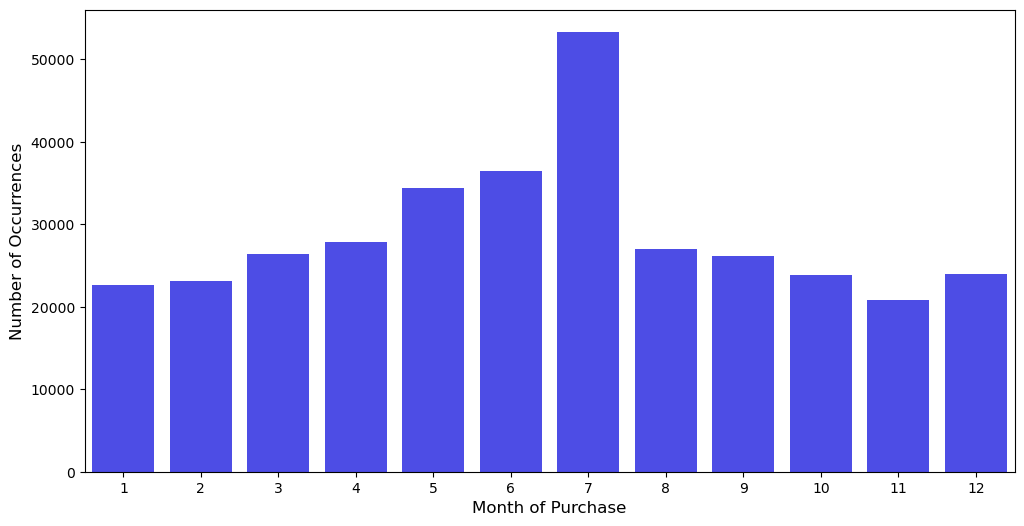

In [215]:
temp_df['Purchase Month'] = temp_df['Purchase Date'].dt.month

cnt_srs = temp_df['Purchase Month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')  
#plt.xticks(rotation='vertical')
plt.xlabel('Month of Purchase', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Purchases peak in May, June, and July. The US fiscal year ends in September, so this may be an end of the year rush to finish purchases.

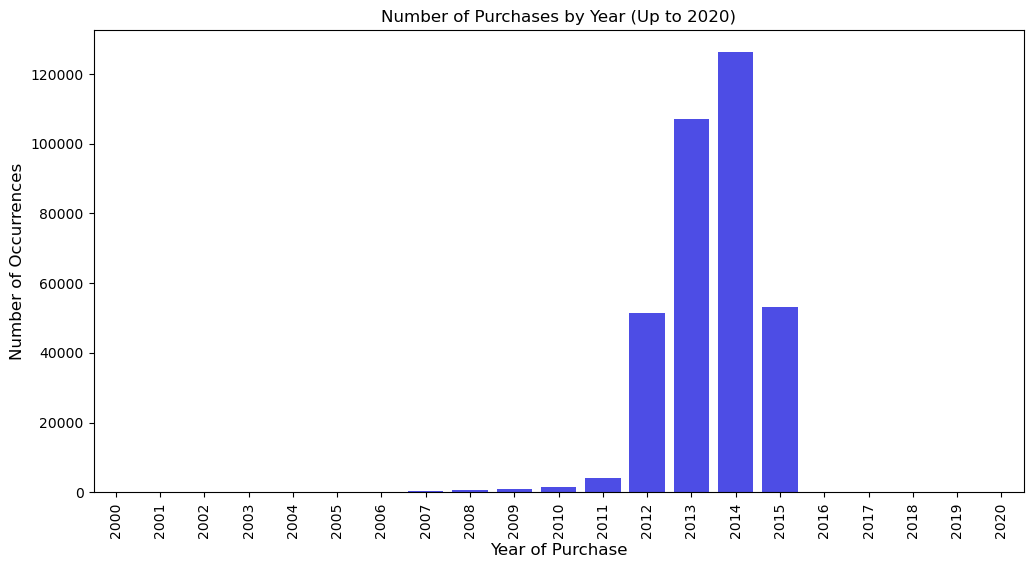

In [216]:
# Add a column for Purchase Year
temp_df['Purchase Year'] = temp_df['Purchase Date'].dt.year

# Filter the data to include only records up to the year 2020
filtered_df = temp_df[temp_df['Purchase Year'] <= 2020]

# Count the number of purchases for each year
cnt_srs = filtered_df['Purchase Year'].value_counts()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Year of Purchase', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.title('Number of Purchases by Year (Up to 2020)')
plt.show()


Most of the purchases were made in 2013-2014. Interestingly there are some future values, possibly erroneous, possibly purchases made on a subscription.

**Acquisition Type**

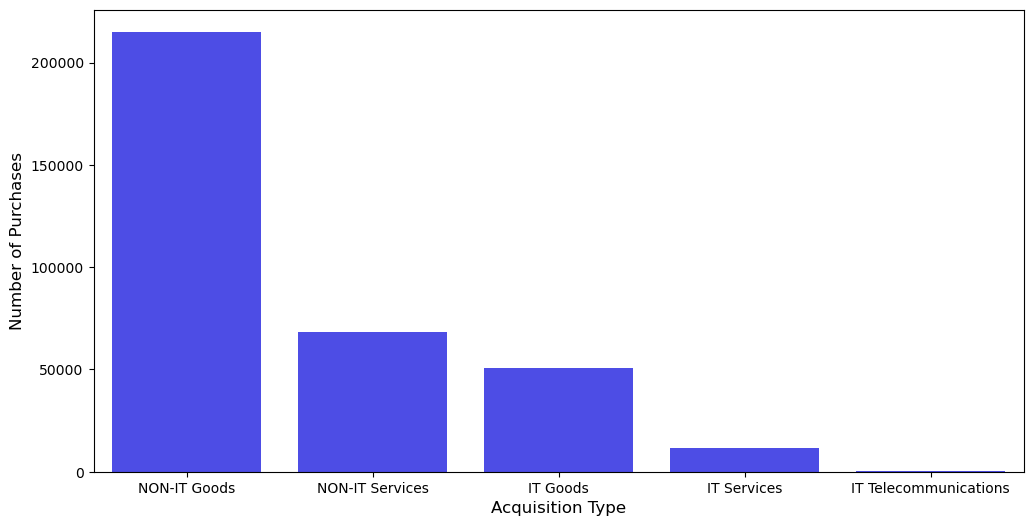

In [217]:
cnt_srs = df['Acquisition Type'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')  
#plt.xticks(rotation='vertical')
plt.xlabel('Acquisition Type', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

Most acquisitions are not IT related

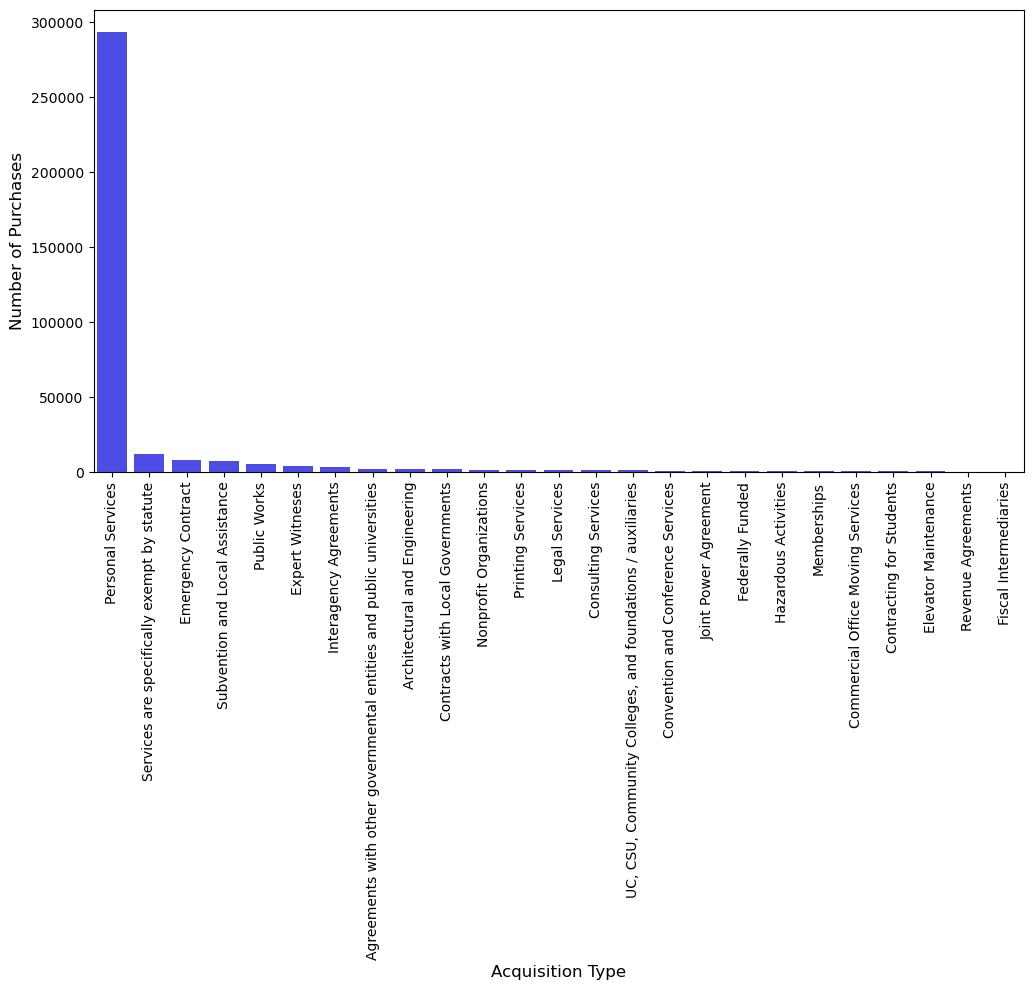

In [218]:
cnt_srs = df['Sub-Acquisition Type'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')  
plt.xticks(rotation='vertical')
plt.xlabel('Acquisition Type', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

And they tend to be "personal services"

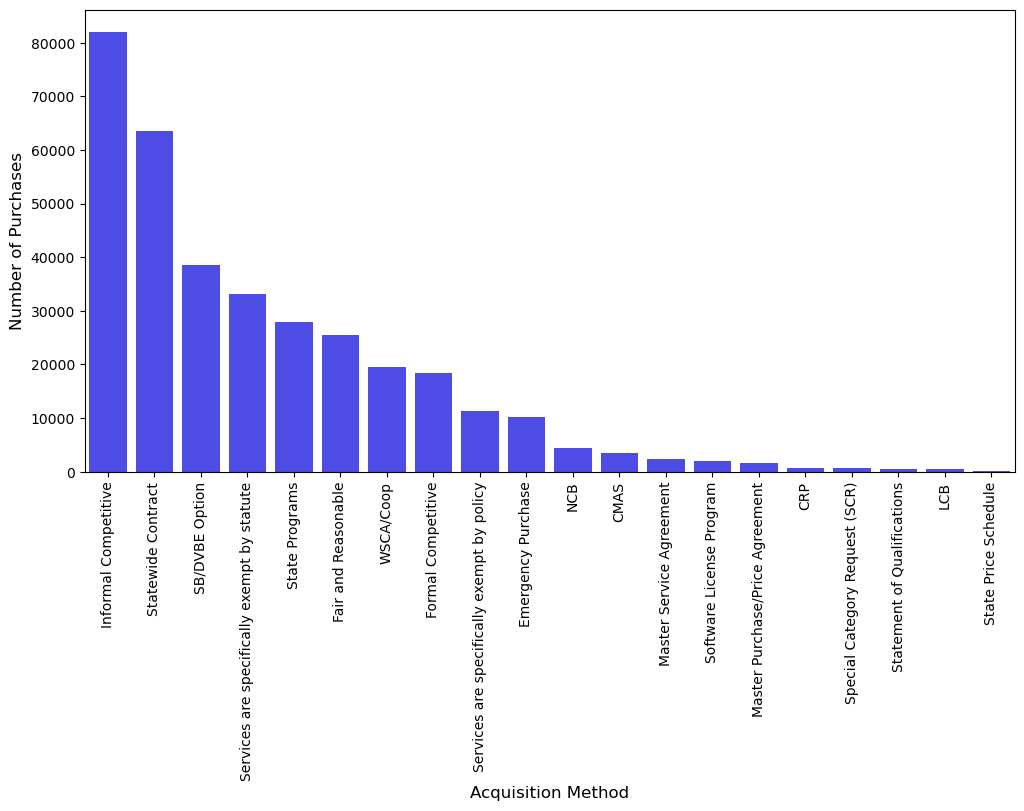

In [219]:
cnt_srs = df['Acquisition Method'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')  
plt.xticks(rotation='vertical')
plt.xlabel('Acquisition Method', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

The most common purchase type is an "informal competition" followed by a statewide contract"

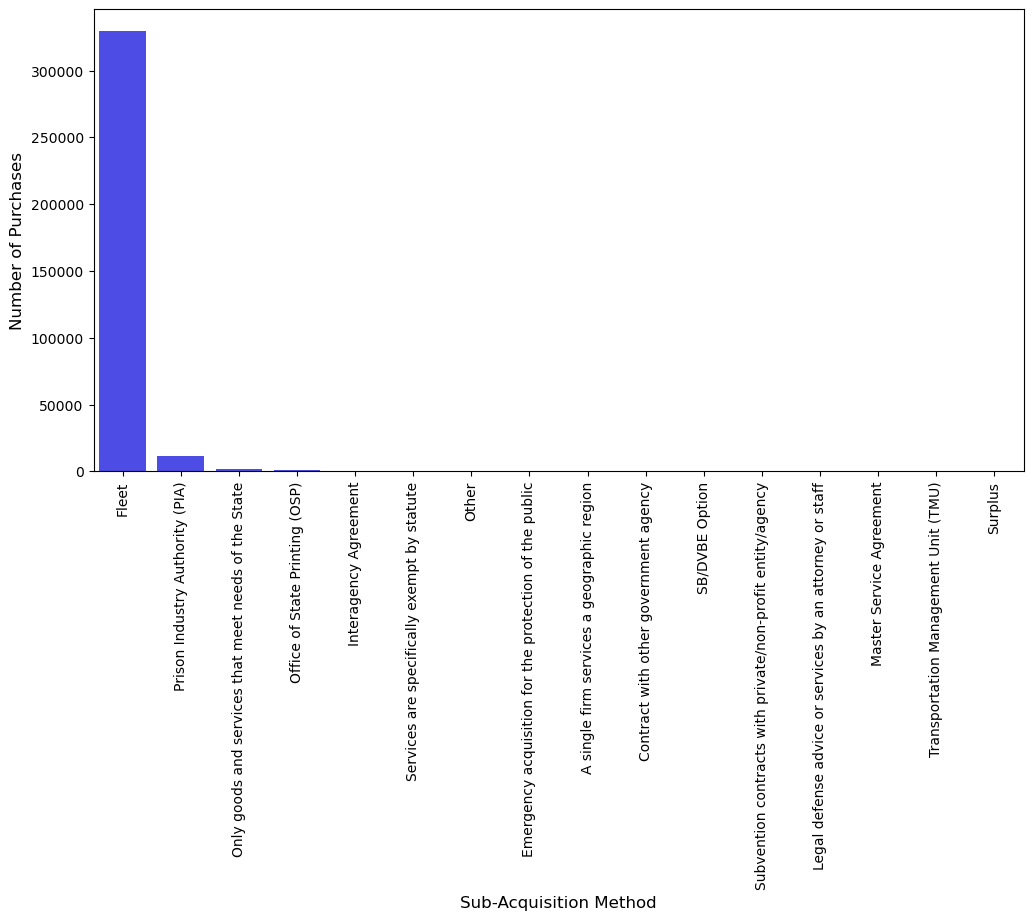

In [220]:
cnt_srs = df['Sub-Acquisition Method'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')  
plt.xticks(rotation='vertical')
plt.xlabel('Sub-Acquisition Method', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

**Total Price**

In [221]:
purchase_prices = [float(x[1:]) for x in df['Total Price'].dropna()]

print('Minimum Purchase Price = ' + str(min(purchase_prices)))
print('Maximum Purchase Price = ' + str(max(purchase_prices)))
print('Average Purchase Price = ' + str(np.mean(purchase_prices)))

Minimum Purchase Price = -30861228.0
Maximum Purchase Price = 7337038064.0
Average Purchase Price = 437097.4356773347


Filtering Data for a Specific Time Period and Counting Unique Orders

In [222]:
# Function to filter data for specific quarters over a range of years
def get_orders_by_quarters(start_year, end_year, quarters):
    """
    Parameters:
    start_year (int): The start year of the period.
    end_year (int): The end year of the period.
    quarters (list): List of quarters to include (e.g., [1, 2] for Q1 and Q2).
    """
    # Define start and end months for each quarter
    quarter_ranges = {
        1: ('01-01', '03-31'),
        2: ('04-01', '06-30'),
        3: ('07-01', '09-30'),
        4: ('10-01', '12-31')
    }
    
    # Filter data for each year and quarter within the range
    total_orders = 0
    for year in range(start_year, end_year + 1):
        for quarter in quarters:
            start_date = f"{year}-{quarter_ranges[quarter][0]}"
            end_date = f"{year}-{quarter_ranges[quarter][1]}"
            
            # Filter data for the specific quarter
            specific_period = df[(df['Creation Date'] >= start_date) & (df['Creation Date'] <= end_date)]
            
            # Count unique purchase orders
            total_orders += specific_period['Purchase Order Number'].nunique()
            print(f"Total orders in Q{quarter} of {year}: {specific_period['Purchase Order Number'].nunique()}")
    
    print(f"Total orders from {start_year} to {end_year} for quarters {quarters}: {total_orders}")

# Example usage:
# Get orders for Q1 and Q2 from 2013 to 2015
get_orders_by_quarters(2013, 2015, [1, 2])

# Get orders for all quarters from 2012 to 2015
get_orders_by_quarters(2012, 2015, [1, 2, 3, 4])


Total orders in Q1 of 2013: 14819
Total orders in Q2 of 2013: 20670
Total orders in Q1 of 2014: 14641
Total orders in Q2 of 2014: 23044
Total orders in Q1 of 2015: 14713
Total orders in Q2 of 2015: 21510
Total orders from 2013 to 2015 for quarters [1, 2]: 109397
Total orders in Q1 of 2012: 0
Total orders in Q2 of 2012: 0
Total orders in Q3 of 2012: 16264
Total orders in Q4 of 2012: 14422
Total orders in Q1 of 2013: 14819
Total orders in Q2 of 2013: 20670
Total orders in Q3 of 2013: 16479
Total orders in Q4 of 2013: 14398
Total orders in Q1 of 2014: 14641
Total orders in Q2 of 2014: 23044
Total orders in Q3 of 2014: 18352
Total orders in Q4 of 2014: 14385
Total orders in Q1 of 2015: 14713
Total orders in Q2 of 2015: 21510
Total orders in Q3 of 2015: 0
Total orders in Q4 of 2015: 0
Total orders from 2012 to 2015 for quarters [1, 2, 3, 4]: 203697


In [223]:
# Filter data for a specific time period (e.g., a quarter)
specific_period = df[(df['Creation Date'] >= '2015-01-01') & (df['Creation Date'] <= '2015-03-31')]

# Calculate the total number of unique purchase orders within the specified period
total_orders = specific_period['Purchase Order Number'].nunique()
print(f"Total number of orders in the specific period: {total_orders}")


Total number of orders in the specific period: 14713


In [224]:
# Add a column for the financial quarter
df['Quarter'] = df['Creation Date'].dt.to_period('Q')

# Calculate total spending for each quarter
quarter_spending = df.groupby('Quarter')['Total Price'].sum()

# Identify the quarter with the highest spending
highest_spending_quarter = quarter_spending.idxmax()
print(f"Quarter with the highest spending: {highest_spending_quarter}")
print("\nSpending per Quarter:")
print(quarter_spending)

Quarter with the highest spending: 2012Q4

Spending per Quarter:
Quarter
2012Q3    $24.73$203.10$151.56$24.00$128.13$580.00$123.7...
2012Q4    $990.00$12587.05$199.00$4950.00$14686.50$21478...
2013Q1    $288.00$199172.20$4630.00$7570.78$40000.00$724...
2013Q2    $4317.00$230.29$210.00$15000.00$20000.00$13293...
2013Q3    $1.00$86.60$6415.00$1195.00$10150.00$2860.80$1...
2013Q4    $675.00$113.98$304.38$283.52$2753.15$33990.00$...
2014Q1    $4.00$6080.26$5275.61$520.00$328.00$76.30$7119...
2014Q2    $0.00$400000.00$3593.00$13344.00$3420.00$6912....
2014Q3    $160.75$912.00$0.00$46705.00$263.46$307.93$600...
2014Q4    $0.00$1362.00$180.68$695.60$4.72$460.44$1356.0...
2015Q1    $2032.96$41841.96$330.00$840.00$4778.50$5530.4...
2015Q2    $0.00$1259.96$5225.00$72.99$71.94$848.29$31116...
Freq: Q-DEC, Name: Total Price, dtype: object


Top 10 frequently ordered items:
Item Name
Medical Supplies               2946
Contract                       2092
ew                             1539
Expert Witness                 1317
medical vocational training    1092
Toner                          1046
contract                        983
Office Supplies                 959
Dental Supplies                 772
toner                           658
Name: count, dtype: int64


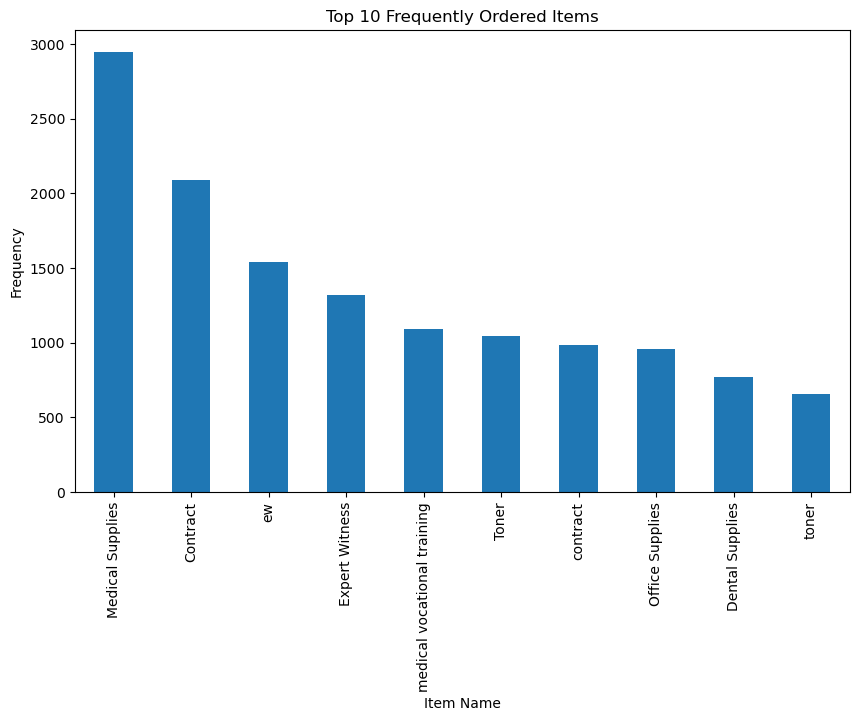

In [166]:
#Analysis of most popular items
frequently_ordered_items = df['Item Name'].value_counts().head(10)
print("Top 10 frequently ordered items:")
print(frequently_ordered_items)
frequently_ordered_items.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.title('Top 10 Frequently Ordered Items')
plt.show()

Top 5 suppliers:
Supplier Name
Voyager Fleet Systems Inc       13792
Grainger Industrial Supply       9441
Prison Industry Authority        8979
3B INDUSTRIES INC                6991
Technology Integration Group     6817
Name: count, dtype: int64


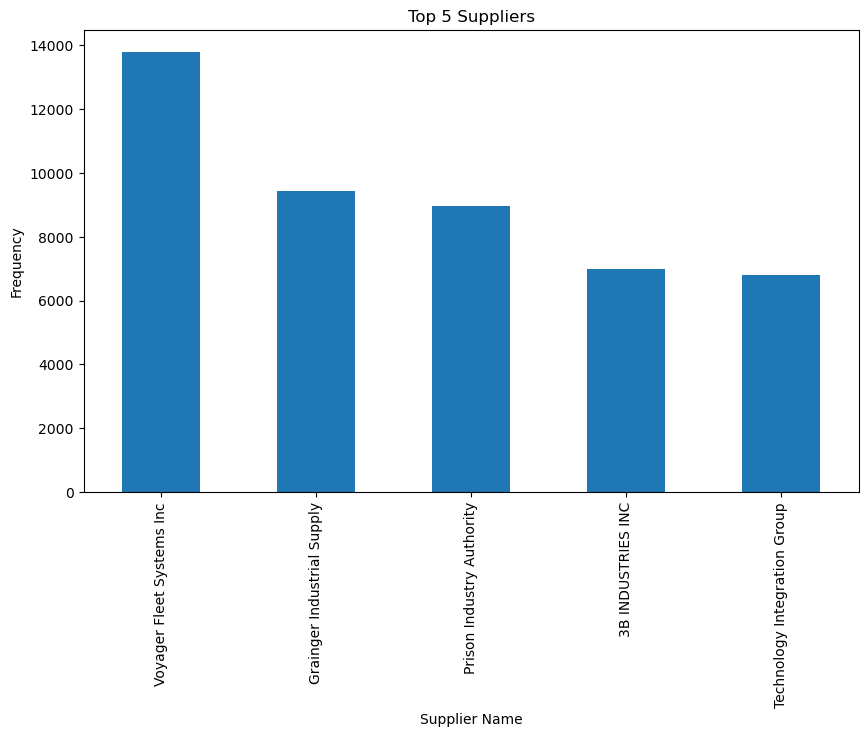

In [225]:
top_suppliers = df['Supplier Name'].value_counts().head(5)
print("Top 5 suppliers:")
print(top_suppliers)
top_suppliers.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Supplier Name')
plt.ylabel('Frequency')
plt.title('Top 5 Suppliers')
plt.show()

In [226]:
department_spending = df.groupby('Department Name')['Total Price'].sum().sort_values(ascending=False)
print("Spending by department:")
print(department_spending.head(5))


Spending by department:
Department Name
Health & Human Services Agency        $997633.00$2662.83$96760.00$0.00$0.00$0.00$0.0...
Transportation, Department of         $9518.47$199172.20$4164.00$6912.40$103934.00$3...
Water Resources, Department of        $86.60$224.16$1032.00$271.60$1101.66$925.92$12...
Managed Health Care, Department of    $848.29$1771.00$1771.00$7058.90$663.00$3380.00...
Motor Vehicles, Department of         $8.75$3637.20$16829.25$956.00$508.00$247680.00...
Name: Total Price, dtype: object


In [227]:
# Fetch the first few records from the MongoDB collection
for doc in collection.find().limit(5):
    print(doc)


{'_id': ObjectId('673b52057b9bc04583454d8f'), 'Creation Date': datetime.datetime(2013, 8, 27, 0, 0), 'Fiscal Year': '2013-2014', 'LPA Number': '7-12-70-26', 'Purchase Order Number': 'REQ0011118', 'Requisition Number': 'REQ0011118', 'Acquisition Type': 'IT Goods', 'Acquisition Method': 'WSCA/Coop', 'Department Name': 'Consumer Affairs, Department of', 'Supplier Code': 1740272.0, 'Supplier Name': 'Pitney Bowes', 'CalCard': 'NO', 'Item Name': 'USB', 'Item Description': 'USB', 'Quantity': 1.0, 'Unit Price': '$1.00', 'Total Price': '$1.00', 'Class': 49276327.668408595, 'Class Title': 'Petroleum and distillates', 'Classification Codes': 15101506, 'Commodity Title': 'Gasoline or Petrol', 'Creation Day': 27, 'Creation Month': 8, 'Creation Year': 2013, 'Family': 49272188.92224916, 'Family Title': 'Office machines and their supplies and accessories', 'Location': '95691\n(38.575311, -121.560401)', 'Normalized UNSPSC': 49321974.0085391, 'Purchase Date': '07/01/2014', 'Quarter': '2013Q3', 'Segment'

In [228]:
df.columns

Index(['_id', 'Creation Date', 'Fiscal Year', 'LPA Number',
       'Purchase Order Number', 'Requisition Number', 'Acquisition Type',
       'Acquisition Method', 'Department Name', 'Supplier Code',
       'Supplier Name', 'CalCard', 'Item Name', 'Item Description', 'Quantity',
       'Unit Price', 'Total Price', 'Class', 'Class Title',
       'Classification Codes', 'Commodity Title', 'Creation Day',
       'Creation Month', 'Creation Year', 'Family', 'Family Title', 'Location',
       'Normalized UNSPSC', 'Purchase Date', 'Quarter', 'Segment',
       'Segment Title', 'Sub-Acquisition Method', 'Sub-Acquisition Type',
       'Supplier Qualifications', 'Supplier Zip Code'],
      dtype='object')

In [229]:
## Iterate through the DataFrame and update or insert each record
#for index, row in df.iterrows():
#   collection.update_one(
#       {'_id': row['_id']},  # Match the record using _id
#       {'$set': row.to_dict()},  # Update the record with all fields
#       upsert=True  # Insert the record if it does not exist
#   )
#
#print("All records updated or inserted successfully.")
#

In [230]:
#for index, row in df.iterrows():
#    existing_record = collection.find_one({'_id': row['_id']})
#    if existing_record is None:
#        collection.insert_one(row.to_dict())
# #   else:
# #       print(f"Record with _id {row['_id']} already exists.")
#

In [231]:
# Fetch and display a few records from MongoDB
for doc in collection.find().limit(5):
    print(doc)


{'_id': ObjectId('673b52057b9bc04583454d8f'), 'Creation Date': datetime.datetime(2013, 8, 27, 0, 0), 'Fiscal Year': '2013-2014', 'LPA Number': '7-12-70-26', 'Purchase Order Number': 'REQ0011118', 'Requisition Number': 'REQ0011118', 'Acquisition Type': 'IT Goods', 'Acquisition Method': 'WSCA/Coop', 'Department Name': 'Consumer Affairs, Department of', 'Supplier Code': 1740272.0, 'Supplier Name': 'Pitney Bowes', 'CalCard': 'NO', 'Item Name': 'USB', 'Item Description': 'USB', 'Quantity': 1.0, 'Unit Price': '$1.00', 'Total Price': '$1.00', 'Class': 49276327.668408595, 'Class Title': 'Petroleum and distillates', 'Classification Codes': 15101506, 'Commodity Title': 'Gasoline or Petrol', 'Creation Day': 27, 'Creation Month': 8, 'Creation Year': 2013, 'Family': 49272188.92224916, 'Family Title': 'Office machines and their supplies and accessories', 'Location': '95691\n(38.575311, -121.560401)', 'Normalized UNSPSC': 49321974.0085391, 'Purchase Date': '07/01/2014', 'Quarter': '2013Q3', 'Segment'

In [232]:
df

,_id,Creation Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,...,Location,Normalized UNSPSC,Purchase Date,Quarter,Segment,Segment Title,Sub-Acquisition Method,Sub-Acquisition Type,Supplier Qualifications,Supplier Zip Code
0,673b52057b9bc04583454d8f,2013-08-27,2013-2014,7-12-70-26,REQ0011118,REQ0011118,IT Goods,WSCA/Coop,"Consumer Affairs, Department of",1740272.0,...,"95691\n(38.575311, -121.560401)",4.932197e+07,07/01/2014,2013Q3,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95691
1,673b52057b9bc04583454d90,2014-01-29,2013-2014,7-11-51-02,REQ0011932,REQ0011932,NON-IT Goods,Informal Competitive,"Consumer Affairs, Department of",1760085.0,...,"95691\n(38.575311, -121.560401)",7.612150e+07,07/01/2014,2014Q1,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95691
2,673b52057b9bc04583454d91,2013-11-01,2013-2014,7-11-51-02,REQ0011476,REQ0011476,IT Services,Informal Competitive,"Consumer Affairs, Department of",17224.0,...,"95841\n(38.662263, -121.346136)",4.932197e+07,07/01/2014,2013Q4,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95841
3,673b52057b9bc04583454d92,2014-06-13,2013-2014,7-11-51-02,4500236642,REQ0008872,NON-IT Goods,Informal Competitive,Correctional Health Care Services,1754462.0,...,"91436\n(34.151642, -118.49051)",4.932197e+07,06/05/2014,2014Q2,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,91436
4,673b52057b9bc04583454d93,2014-03-12,2013-2014,1-10-75-60A,4500221028,REQ0008872,NON-IT Goods,Statewide Contract,"Corrections and Rehabilitation, Department of",1087660.0,...,"95814\n(38.580427, -121.494396)",4.410313e+07,03/12/2014,2014Q1,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346013,673b522b7b9bc045834a952c,2014-11-03,2014-2015,7-11-51-02,4500252536,REQ0008872,NON-IT Goods,Informal Competitive,"Corrections and Rehabilitation, Department of",12205.0,...,"95811\n(38.581053, -121.488564)",9.313161e+07,09/25/2014,2014Q4,9.300000e+07,Politics and Civic Affairs Services,Fleet,Personal Services,CA-SB,95811
346014,673b522b7b9bc045834a952d,2014-08-14,2014-2015,7-11-51-02,10A1343,REQ0008872,NON-IT Services,Services are specifically exempt by statute,"Transportation, Department of",1018638.0,...,"95816\n(38.57219, -121.467691)",8.012190e+07,07/20/2011,2014Q3,8.000000e+07,Management and Business Professionals and Admi...,Fleet,Expert Witneses,CA-MB CA-SB,95816
346015,673b522b7b9bc045834a952e,2014-05-09,2013-2014,7-11-51-02,228,REQ0008872,IT Goods,SB/DVBE Option,"High Speed Rail Authority, California",1136849.0,...,"95829\n(38.474725, -121.340819)",4.511161e+07,07/01/2014,2014Q2,4.500000e+07,Printing and Photographic and Audio and Visual...,Fleet,Personal Services,CA-MB CA-SB,95829
346016,673b522b7b9bc045834a952f,2014-01-14,2013-2014,7-11-51-02,P1300614,REQ0008872,NON-IT Goods,Fair and Reasonable,Franchise Tax Board,8329.0,...,"95630\n(38.670213, -121.147592)",2.711272e+07,01/14/2014,2014Q1,2.700000e+07,Tools and General Machinery,Fleet,Personal Services,CA-MB CA-SB,95630


In [233]:
# نسخ الـ DataFrame
backup_df = df.copy()

# التأكد من النسخة
print("Backup DataFrame created successfully!")
backup_df.head()

Backup DataFrame created successfully!


,_id,Creation Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,...,Location,Normalized UNSPSC,Purchase Date,Quarter,Segment,Segment Title,Sub-Acquisition Method,Sub-Acquisition Type,Supplier Qualifications,Supplier Zip Code
0,673b52057b9bc04583454d8f,2013-08-27,2013-2014,7-12-70-26,REQ0011118,REQ0011118,IT Goods,WSCA/Coop,"Consumer Affairs, Department of",1740272.0,...,"95691\n(38.575311, -121.560401)",4.932197e+07,07/01/2014,2013Q3,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95691
1,673b52057b9bc04583454d90,2014-01-29,2013-2014,7-11-51-02,REQ0011932,REQ0011932,NON-IT Goods,Informal Competitive,"Consumer Affairs, Department of",1760085.0,...,"95691\n(38.575311, -121.560401)",7.612150e+07,07/01/2014,2014Q1,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95691
2,673b52057b9bc04583454d91,2013-11-01,2013-2014,7-11-51-02,REQ0011476,REQ0011476,IT Services,Informal Competitive,"Consumer Affairs, Department of",17224.0,...,"95841\n(38.662263, -121.346136)",4.932197e+07,07/01/2014,2013Q4,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95841
3,673b52057b9bc04583454d92,2014-06-13,2013-2014,7-11-51-02,4500236642,REQ0008872,NON-IT Goods,Informal Competitive,Correctional Health Care Services,1754462.0,...,"91436\n(34.151642, -118.49051)",4.932197e+07,06/05/2014,2014Q2,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,91436
4,673b52057b9bc04583454d93,2014-03-12,2013-2014,1-10-75-60A,4500221028,REQ0008872,NON-IT Goods,Statewide Contract,"Corrections and Rehabilitation, Department of",1087660.0,...,"95814\n(38.580427, -121.494396)",4.410313e+07,03/12/2014,2014Q1,4.913283e+07,Information Technology Broadcasting and Teleco...,Fleet,Personal Services,CA-MB CA-SB,95814


# 4. Model Development

In [267]:
!pip install nltk spacy scikit-learn pandas numpy

  Using cached spacy-3.8.2-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata (8.6 kB)
  Using cached preshed-3.0.9-cp311-cp311-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.3.2-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached blis-1.0.1-cp311-cp311-win_amd64.whl.metadata (7.8 kB)
  Using cached confection-0.1.

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [55 lines of output]
  The Meson build system
  Version: 0.62.2
  Source dir: C:\Users\DELL\AppData\Local\Temp\pip-install-7v3bjip8\scipy_f8365d57ae8b48b485a3fe4e2f1bc5d7
  Build dir: C:\Users\DELL\AppData\Local\Temp\pip-install-7v3bjip8\scipy_f8365d57ae8b48b485a3fe4e2f1bc5d7\.mesonpy-r81qkrqf\build
  Build type: native build
  Project name: SciPy
  Project version: 1.9.1
  
  ..\..\meson.build:1:0: ERROR: Unknown compiler(s): [['icl'], ['cl'], ['cc'], ['gcc'], ['clang'], ['clang-cl'], ['pgcc']]
  The following exception(s) were encountered:
  Running "icl " gave "[WinError 2] The system cannot find the file specified"
  Running "cl /?" gave "[WinError 2] The system cannot find the file specified"
  Running "cc --version" gave "[WinError 2] The system cannot find the file specified"
  Running "gcc --version" gave "[WinError 2] The system cannot find the file spec

In [268]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data package

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [269]:
expanded_data = {
    "queries": [
        # spending_query
        "What is the total spending for Q1 of 2013?",
        "How much was spent in 2015?",
        "Show total spending for Q2 of 2014.",
        "Provide spending details for Q3 of 2016.",
        "List expenditures for Q4 of 2012.",
        "How much did we spend in fiscal year 2015-2016?",
        "Total spending in Q3 of 2014?",
        "What is the highest spending quarter in 2013?",

        # supplier_query
        "Who is the top supplier for IT equipment?",
        "List suppliers with highest spending in 2015.",
        "Who supplied the most in Q4 of 2013?",
        "Top suppliers in Q3 2014.",
        "Show suppliers ranked by total spending.",
        "Which supplier received the highest payment in 2015?",
        "List all suppliers for department A.",

        # order_list_query
        "List all purchase orders in January 2016.",
        "Show purchase orders for Q2 of 2015.",
        "Orders placed in 2014 for IT goods.",
        "List open orders for 2015.",
        "Show me purchase orders made by the finance department.",
        "Which orders were placed in Q3 of 2013?",
        "Provide order details for fiscal year 2014.",

        # item_frequency_query
        "What are the most frequently ordered items?",
        "List the top 5 most purchased items in 2015.",
        "Frequently ordered items by IT in Q1 2016.",
        "Which item was ordered the most in Q4 2014?",
        "Top 3 frequently ordered items in 2013.",
        "What are the most popular items in 2015?",

        # department_spending_query
        "Which department spent the most in Q2 of 2015?",
        "Provide spending breakdown for HR in 2016.",
        "Top spending departments in Q3 of 2014.",
        "Show departmental spending for Q1 2013.",
        "Which department had the lowest spending in 2015?",
        "How much did department X spend in 2016?"
    ],
    "labels": [
        "spending_query", "spending_query", "spending_query", "spending_query", "spending_query", 
        "spending_query", "spending_query", "spending_query",
        "supplier_query", "supplier_query", "supplier_query", "supplier_query", "supplier_query",
        "supplier_query", "supplier_query",
        "order_list_query", "order_list_query", "order_list_query", "order_list_query", "order_list_query", 
        "order_list_query", "order_list_query",
        "item_frequency_query", "item_frequency_query", "item_frequency_query", "item_frequency_query", 
        "item_frequency_query", "item_frequency_query",
        "department_spending_query", "department_spending_query", "department_spending_query", 
        "department_spending_query", "department_spending_query", "department_spending_query"
    ]
}

# تحويل البيانات إلى DataFrame
import pandas as pd
new_df = pd.DataFrame(expanded_data)

# دمج البيانات الجديدة مع البيانات الأصلية
df = pd.concat([df, new_df], ignore_index=True)
new_df.head()

,queries,labels
0,What is the total spending for Q1 of 2013?,spending_query
1,How much was spent in 2015?,spending_query
2,Show total spending for Q2 of 2014.,spending_query
3,Provide spending details for Q3 of 2016.,spending_query
4,List expenditures for Q4 of 2012.,spending_query


 Data split

In [270]:
from sklearn.model_selection import train_test_split

# Data split
X_train, X_test, y_train, y_test = train_test_split(df['queries'], df['labels'], test_size=0.2, random_state=42)


In [271]:
#Check for missing values ​​in y_train and y_test

print("Missing values in X_train:", X_train.isnull().sum())
print("Missing values in X_test:", X_test.isnull().sum())

print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())


Missing values in X_train: 276810
Missing values in X_test: 69208
Missing values in y_train: 276810
Missing values in y_test: 69208


In [272]:
# Delete rows with missing values ​​in y_train and X_train
non_null_train_indices = y_train.dropna().index
X_train = X_train.loc[non_null_train_indices]
y_train = y_train.dropna()

# Delete rows with missing values ​​in y_test and X_test
non_null_test_indices = y_test.dropna().index
X_test = X_test.loc[non_null_test_indices]
y_test = y_test.dropna()


**LogisticRegression**

In [273]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Build the model
model = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), LogisticRegression(max_iter=1000))

# تدريب النموذج
model.fit(X_train, y_train)

# Train the model
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.875

Classification Report:
                            precision    recall  f1-score   support

department_spending_query       1.00      0.50      0.67         4
     item_frequency_query       1.00      1.00      1.00         1
         order_list_query       1.00      1.00      1.00         4
           spending_query       0.67      1.00      0.80         4
           supplier_query       1.00      1.00      1.00         3

                 accuracy                           0.88        16
                macro avg       0.93      0.90      0.89        16
             weighted avg       0.92      0.88      0.87        16



In [274]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # تجربة قيم أوسع للـ Regularization
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # تجربة N-grams أكبر
    'logisticregression__solver': ['lbfgs', 'liblinear'],  # تجربة Solvers مختلفة
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# طباعة أفضل المعلمات
print("Best parameters after extended GridSearch:", grid.best_params_)


Best parameters after extended GridSearch: {'logisticregression__C': 10, 'logisticregression__solver': 'lbfgs', 'tfidfvectorizer__ngram_range': (1, 1)}


In [275]:
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__solver': ['lbfgs', 'liblinear'],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# أفضل المعلمات
print("Best parameters after extended GridSearch:", grid.best_params_)

# تقييم الأداء بعد التحسين
best_model = grid.best_estimator_
final_predictions = best_model.predict(X_test)

final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Accuracy after extended GridSearch: {final_accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, predictions))


Best parameters after extended GridSearch: {'logisticregression__C': 10, 'logisticregression__solver': 'lbfgs', 'tfidfvectorizer__ngram_range': (1, 1)}
Final Accuracy after extended GridSearch: 100.00%

Classification Report:
                            precision    recall  f1-score   support

department_spending_query       1.00      0.50      0.67         4
     item_frequency_query       1.00      1.00      1.00         1
         order_list_query       1.00      1.00      1.00         4
           spending_query       0.67      1.00      0.80         4
           supplier_query       1.00      1.00      1.00         3

                 accuracy                           0.88        16
                macro avg       0.93      0.90      0.89        16
             weighted avg       0.92      0.88      0.87        16



Random Forest

In [276]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

rf_model = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), RandomForestClassifier(random_state=42))
rf_model.fit(X_train, y_train)

# تقييم الأداء
rf_predictions = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {accuracy *100:.2f}%")


Random Forest Accuracy: 100.00%


XGBoost

In [277]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [278]:
from sklearn.preprocessing import LabelEncoder

# تحويل y_train و y_test إلى تصنيفات رقمية
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [279]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# إنشاء النموذج باستخدام Tfidf و XGBoost
xgb_model = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), 
                          XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))

# تدريب النموذج
xgb_model.fit(X_train, y_train_encoded)

# التنبؤ على بيانات الاختبار
xgb_predictions = xgb_model.predict(X_test)

# إعادة تحويل التوقعات من أرقام إلى تسميات نصية
xgb_predictions_labels = label_encoder.inverse_transform(xgb_predictions)

# تقييم الأداء
accuracy = accuracy_score(y_test, xgb_predictions_labels)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, xgb_predictions_labels))


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:08:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 100.00%

Classification Report:
                            precision    recall  f1-score   support

department_spending_query       1.00      1.00      1.00         4
     item_frequency_query       1.00      1.00      1.00         1
         order_list_query       1.00      1.00      1.00         4
           spending_query       1.00      1.00      1.00         4
           supplier_query       1.00      1.00      1.00         3

                 accuracy                           1.00        16
                macro avg       1.00      1.00      1.00        16
             weighted avg       1.00      1.00      1.00        16



Decision Tree

In [280]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# إنشاء نموذج Decision Tree
dt_model = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), DecisionTreeClassifier(random_state=42))

# تدريب النموذج
dt_model.fit(X_train, y_train)

# التنبؤ باستخدام بيانات الاختبار
dt_predictions = dt_model.predict(X_test)

# تقييم الأداء
accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 100.00%

Classification Report:
                            precision    recall  f1-score   support

department_spending_query       1.00      1.00      1.00         4
     item_frequency_query       1.00      1.00      1.00         1
         order_list_query       1.00      1.00      1.00         4
           spending_query       1.00      1.00      1.00         4
           supplier_query       1.00      1.00      1.00         3

                 accuracy                           1.00        16
                macro avg       1.00      1.00      1.00        16
             weighted avg       1.00      1.00      1.00        16



In [281]:
param_grid = {'decisiontreeclassifier__max_depth': [5, 10, 15, 20],
              'decisiontreeclassifier__criterion': ['gini', 'entropy']}
grid_dt = GridSearchCV(dt_model, param_grid, cv=5)
grid_dt.fit(X_train, y_train)

print("Best Decision Tree parameters:", grid_dt.best_params_)


Best Decision Tree parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10}


SVM

In [282]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# إنشاء نموذج SVM
svm_model = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), SVC(kernel='linear', random_state=42))

# تدريب النموذج
svm_model.fit(X_train, y_train)

# التنبؤ باستخدام بيانات الاختبار
svm_predictions = svm_model.predict(X_test)

# تقييم الأداء
accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, svm_predictions))


SVM Accuracy: 100.00%

Classification Report:
                            precision    recall  f1-score   support

department_spending_query       1.00      1.00      1.00         4
     item_frequency_query       1.00      1.00      1.00         1
         order_list_query       1.00      1.00      1.00         4
           spending_query       1.00      1.00      1.00         4
           supplier_query       1.00      1.00      1.00         3

                 accuracy                           1.00        16
                macro avg       1.00      1.00      1.00        16
             weighted avg       1.00      1.00      1.00        16



In [283]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Regularization strength
    'svc__kernel': ['linear', 'rbf', 'poly'],  # Different kernels
    'svc__gamma': ['scale', 'auto']  # Only for 'rbf' and 'poly'
}

grid_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# طباعة أفضل المعلمات
print("Best SVM parameters:", grid_svm.best_params_)

# التقييم باستخدام النموذج المحسن
best_svm_model = grid_svm.best_estimator_
svm_predictions = best_svm_model.predict(X_test)

# طباعة النتائج
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Optimized SVM Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, svm_predictions))


Best SVM parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Optimized SVM Accuracy: 100.00%

Classification Report:
                            precision    recall  f1-score   support

department_spending_query       1.00      1.00      1.00         4
     item_frequency_query       1.00      1.00      1.00         1
         order_list_query       1.00      1.00      1.00         4
           spending_query       1.00      1.00      1.00         4
           supplier_query       1.00      1.00      1.00         3

                 accuracy                           1.00        16
                macro avg       1.00      1.00      1.00        16
             weighted avg       1.00      1.00      1.00        16



All Models 

In [284]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# استخدام LabelEncoder لتشفير y_train و y_test
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# قائمة لتخزين النتائج
model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'SVM']
accuracies = []
classification_reports = {}

# 1. Logistic Regression
lr_predictions = model.predict(X_test)
classification_reports['Logistic Regression'] = classification_report(y_test, lr_predictions, output_dict=True)
accuracies.append(accuracy_score(y_test, lr_predictions))


# 2. Decision Tree
dt_predictions = dt_model.predict(X_test)
classification_reports['Decision Tree'] = classification_report(y_test, dt_predictions, output_dict=True)
accuracies.append(accuracy_score(y_test, dt_predictions))

# 3. XGBoost
xgb_predictions = xgb_model.predict(X_test)
xgb_predictions_labels = label_encoder.inverse_transform(xgb_predictions)
classification_reports['XGBoost'] = classification_report(y_test, xgb_predictions_labels, output_dict=True)
accuracies.append(accuracy_score(y_test, xgb_predictions_labels))

# 4. SVM
svm_predictions = svm_model.predict(X_test)
classification_reports['SVM'] = classification_report(y_test, svm_predictions, output_dict=True)
accuracies.append(accuracy_score(y_test, svm_predictions))

# عرض النتائج في جدول
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': [f"{acc * 100:.2f}%" for acc in accuracies]
})

print("\nModel Comparison:")
print(comparison_df)

# طباعة تقارير التصنيف لكل نموذج
for model_name, report in classification_reports.items():
    print(f"\nClassification Report for {model_name}:\n")
    print(pd.DataFrame(report).transpose())



Model Comparison:
                 Model Accuracy
0  Logistic Regression   87.50%
1        Decision Tree  100.00%
2              XGBoost  100.00%
3                  SVM  100.00%

Classification Report for Logistic Regression:

                           precision  recall  f1-score  support
department_spending_query   1.000000   0.500  0.666667    4.000
item_frequency_query        1.000000   1.000  1.000000    1.000
order_list_query            1.000000   1.000  1.000000    4.000
spending_query              0.666667   1.000  0.800000    4.000
supplier_query              1.000000   1.000  1.000000    3.000
accuracy                    0.875000   0.875  0.875000    0.875
macro avg                   0.933333   0.900  0.893333   16.000
weighted avg                0.916667   0.875  0.866667   16.000

Classification Report for Decision Tree:

                           precision  recall  f1-score  support
department_spending_query        1.0     1.0       1.0      4.0
item_frequency_query     

In [285]:
from sklearn.model_selection import cross_val_score

models = [model, dt_model, xgb_model, svm_model]
model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'SVM']

for name, mdl in zip(model_names, models):
    scores = cross_val_score(mdl, X_train, y_train_encoded, cv=5, error_score='raise')
    print(f"{name} Cross-Validation Accuracy: {scores.mean() * 100:.2f}%")


Logistic Regression Cross-Validation Accuracy: 93.07%
Decision Tree Cross-Validation Accuracy: 97.71%


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:10:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\xgbo

XGBoost Cross-Validation Accuracy: 98.89%
SVM Cross-Validation Accuracy: 95.36%


**Logistic Regression Cross-Validation Accuracy: 93.0**

**Decision Tree Cross-Validation Accuracy: 97.71%**

**XGBoost Cross-Validation Accuracy: 98.89%**

**SVM Cross-Validation Accuracy: 95.36%**

# 5. Create Chatbot

In [286]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# إنشاء النموذج مع Decision Tree
dt_model = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 2)),
    DecisionTreeClassifier(random_state=42)
)

# تدريب النموذج
dt_model.fit(X_train, y_train)

# التنبؤ باستخدام بيانات الاختبار
dt_predictions = dt_model.predict(X_test)

# تقييم الأداء
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 100.00%

Classification Report:
                            precision    recall  f1-score   support

department_spending_query       1.00      1.00      1.00         4
     item_frequency_query       1.00      1.00      1.00         1
         order_list_query       1.00      1.00      1.00         4
           spending_query       1.00      1.00      1.00         4
           supplier_query       1.00      1.00      1.00         3

                 accuracy                           1.00        16
                macro avg       1.00      1.00      1.00        16
             weighted avg       1.00      1.00      1.00        16



In [287]:
from sklearn.model_selection import GridSearchCV

# إعداد معلمات GridSearch
param_grid = {
    'decisiontreeclassifier__max_depth': [5, 10, 15, 20, None],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
}

# تحسين النموذج باستخدام GridSearchCV
grid_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# أفضل معلمات
print("Best parameters for Decision Tree:", grid_dt.best_params_)

# استخدام أفضل نموذج
dt_best_model = grid_dt.best_estimator_

# التنبؤ باستخدام النموذج المحسن
dt_best_predictions = dt_best_model.predict(X_test)

# تقييم الأداء
dt_best_accuracy = accuracy_score(y_test, dt_best_predictions)
print(f"Improved Decision Tree Accuracy: {dt_best_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, dt_best_predictions))


Best parameters for Decision Tree: {'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_split': 2}
Improved Decision Tree Accuracy: 100.00%

Classification Report:
                            precision    recall  f1-score   support

department_spending_query       1.00      1.00      1.00         4
     item_frequency_query       1.00      1.00      1.00         1
         order_list_query       1.00      1.00      1.00         4
           spending_query       1.00      1.00      1.00         4
           supplier_query       1.00      1.00      1.00         3

                 accuracy                           1.00        16
                macro avg       1.00      1.00      1.00        16
             weighted avg       1.00      1.00      1.00        16



In [288]:
def classify_user_query(query, model):
    """Classify user query using the trained Decision Tree model."""
    prediction = model.predict([query])
    return prediction[0]


In [289]:
def generate_response(query, model):
    """Generate a dynamic response based on the classified query."""
    label = classify_user_query(query, model)
    
    if label == "spending_query":
        result = collection.aggregate([
            {"$group": {"_id": "$Quarter", "total_spending": {"$sum": "$Total Price"}}}
        ])
        return f"Total spending by quarter: {list(result)}"
    
    elif label == "supplier_query":
        result = collection.aggregate([
            {"$group": {"_id": "$Supplier Name", "total_orders": {"$sum": 1}}},
            {"$sort": {"total_orders": -1}}
        ])
        return f"Top suppliers by order count: {list(result)}"
    
    else:
        return "I'm sorry, I can't handle that query yet."


In [290]:
user_query1 = "What is the total spending for Q1 of 2014?"
response1 = generate_response(user_query1, dt_best_model)
print("Response 1:", response1)

user_query2 = "Who are the top suppliers?"
response2 = generate_response(user_query2, dt_best_model)
print("Response 2:", response2)


Response 1: Total spending by quarter: [{'_id': '2014Q1', 'total_spending': 0}, {'_id': '2013Q2', 'total_spending': 0}, {'_id': '2012Q4', 'total_spending': 0}, {'_id': '2012Q3', 'total_spending': 0}, {'_id': '2014Q2', 'total_spending': 0}, {'_id': '2013Q1', 'total_spending': 0}, {'_id': '2015Q2', 'total_spending': 0}, {'_id': '2014Q3', 'total_spending': 0}, {'_id': '2014Q4', 'total_spending': 0}, {'_id': '2015Q1', 'total_spending': 0}, {'_id': '2013Q4', 'total_spending': 0}, {'_id': '2013Q3', 'total_spending': 0}]
Response 2: Top suppliers by order count: [{'_id': 'Voyager Fleet Systems Inc', 'total_orders': 13792}, {'_id': 'Grainger Industrial Supply', 'total_orders': 9441}, {'_id': 'Prison Industry Authority', 'total_orders': 8979}, {'_id': '3B INDUSTRIES INC', 'total_orders': 6991}, {'_id': 'Technology Integration Group', 'total_orders': 6817}, {'_id': 'Smile Business Products, Inc', 'total_orders': 5979}, {'_id': 'Western Blue, an NWN Company', 'total_orders': 5045}, {'_id': 'Unkno

In [291]:
sample_data = collection.find({}, {"Total Price": 1, "_id": 0}).limit(10)
for doc in sample_data:
    print(doc)


{'Total Price': '$1.00'}
{'Total Price': '$4.00'}
{'Total Price': '$675.00'}
{'Total Price': '$0.00'}
{'Total Price': '$6080.26'}
{'Total Price': '$0.00'}
{'Total Price': '$1362.00'}
{'Total Price': '$400000.00'}
{'Total Price': '$2032.96'}
{'Total Price': '$86.60'}


In [292]:
import pandas as pd

# جلب البيانات من MongoDB
df = pd.DataFrame(list(collection.find()))

# تنظيف القيم النصية في Total Price وتحويلها إلى أرقام
df['Total Price'] = df['Total Price'].replace('[\$,]', '', regex=True).astype(float)

# تحديث القيم في MongoDB
for index, row in df.iterrows():
    collection.update_one(
        {'_id': row['_id']}, 
        {'$set': {'Total Price': row['Total Price']}}
    )


In [293]:
result = collection.aggregate([
    {"$group": {"_id": "$Quarter", "total_spending": {"$sum": "$Total Price"}}}
])
print(f"Total spending by quarter: {list(result)}")


Total spending by quarter: [{'_id': '2013Q3', 'total_spending': 12554601092.33}, {'_id': '2013Q4', 'total_spending': 4179698801.16}, {'_id': '2014Q1', 'total_spending': 10118001668.73}, {'_id': '2013Q2', 'total_spending': 19013469394.04}, {'_id': '2014Q4', 'total_spending': 3828727527.57}, {'_id': '2015Q1', 'total_spending': 8289285224.84}, {'_id': '2012Q4', 'total_spending': 4544728728.17}, {'_id': '2014Q2', 'total_spending': 15618374092.74}, {'_id': '2014Q3', 'total_spending': 5937650423.76}, {'_id': '2015Q2', 'total_spending': 28804820727.65}, {'_id': '2013Q1', 'total_spending': 25788088561.68}, {'_id': '2012Q3', 'total_spending': 12566134255.53}]


In [294]:
def format_spending_result(result):
    """Format the spending results for better readability."""
    formatted_result = "Quarterly Spending Report:\n"
    for record in sorted(result, key=lambda x: x['_id']):
        formatted_result += f"Quarter: {record['_id']}, Total Spending: ${record['total_spending']:,.2f}\n"
    return formatted_result


In [295]:
def generate_response(query, model):
    """Generate a dynamic response based on the classified query."""
    label = classify_user_query(query, model)
    
    if label == "spending_query":
        result = collection.aggregate([
            {"$group": {"_id": "$Quarter", "total_spending": {"$sum": "$Total Price"}}}
        ])
        return format_spending_result(list(result))
    
    elif label == "supplier_query":
        result = collection.aggregate([
            {"$group": {"_id": "$Supplier Name", "total_orders": {"$sum": 1}}},
            {"$sort": {"total_orders": -1}}
        ])
        return f"Top suppliers by order count: {list(result)}"
    
    else:
        return "I'm sorry, I can't handle that query yet."


In [296]:
user_query = "What is the total spending for each quarter?"
response = generate_response(user_query, dt_best_model)
print(response)


Quarterly Spending Report:
Quarter: 2012Q3, Total Spending: $12,566,134,255.53
Quarter: 2012Q4, Total Spending: $4,544,728,728.17
Quarter: 2013Q1, Total Spending: $25,788,088,561.68
Quarter: 2013Q2, Total Spending: $19,013,469,394.04
Quarter: 2013Q3, Total Spending: $12,554,601,092.33
Quarter: 2013Q4, Total Spending: $4,179,698,801.16
Quarter: 2014Q1, Total Spending: $10,118,001,668.73
Quarter: 2014Q2, Total Spending: $15,618,374,092.74
Quarter: 2014Q3, Total Spending: $5,937,650,423.76
Quarter: 2014Q4, Total Spending: $3,828,727,527.57
Quarter: 2015Q1, Total Spending: $8,289,285,224.84
Quarter: 2015Q2, Total Spending: $28,804,820,727.65



In [297]:
def get_highest_spending_quarter():
    result = collection.aggregate([
        {"$group": {"_id": "$Quarter", "total_spending": {"$sum": "$Total Price"}}},
        {"$sort": {"total_spending": -1}},
        {"$limit": 1}
    ])
    return list(result)[0]


In [299]:
def generate_response(query, model):
    """Generate a dynamic response based on the classified query."""
    label = classify_user_query(query, model)
    
    if label == "spending_query":
        result = collection.aggregate([
            {"$group": {"_id": "$Quarter", "total_spending": {"$sum": "$Total Price"}}}
        ])
        return format_spending_result(list(result))
    
    elif label == "supplier_query":
        result = collection.aggregate([
            {"$group": {"_id": "$Supplier Name", "total_orders": {"$sum": 1}}},
            {"$sort": {"total_orders": -1}}
        ])
        return f"Top suppliers by order count: {list(result)}"
    
    elif label == "order_list_query":
        result = collection.find({}, {"Purchase Order Number": 1, "Creation Date": 1}).limit(10)
        return f"Sample list of purchase orders: {list(result)}"
    
    else:
        return "I'm sorry, I can't handle that query yet."


In [301]:
# استفسار 1: الإنفاق حسب الربع
user_query1 = "What is the total spending for each quarter?"
response1 = generate_response(user_query1, dt_best_model)
print("Response 1:\n", response1)

# استفسار 2: الموردين الأكثر تعاملاً
user_query2 = "Who are the top suppliers?"
response2 = generate_response(user_query2, dt_best_model)
print("\nResponse 2:\n", response2)

# استفسار 3: قائمة الطلبات
user_query3 = "List all purchase orders in Q1 of 2015."
response3 = generate_response(user_query3, dt_best_model)
print("\nResponse 3:\n", response3)


Response 1:
 Quarterly Spending Report:
Quarter: 2012Q3, Total Spending: $12,566,134,255.53
Quarter: 2012Q4, Total Spending: $4,544,728,728.17
Quarter: 2013Q1, Total Spending: $25,788,088,561.68
Quarter: 2013Q2, Total Spending: $19,013,469,394.04
Quarter: 2013Q3, Total Spending: $12,554,601,092.33
Quarter: 2013Q4, Total Spending: $4,179,698,801.16
Quarter: 2014Q1, Total Spending: $10,118,001,668.73
Quarter: 2014Q2, Total Spending: $15,618,374,092.74
Quarter: 2014Q3, Total Spending: $5,937,650,423.76
Quarter: 2014Q4, Total Spending: $3,828,727,527.57
Quarter: 2015Q1, Total Spending: $8,289,285,224.84
Quarter: 2015Q2, Total Spending: $28,804,820,727.65


Response 2:
 Top suppliers by order count: [{'_id': 'Voyager Fleet Systems Inc', 'total_orders': 13792}, {'_id': 'Grainger Industrial Supply', 'total_orders': 9441}, {'_id': 'Prison Industry Authority', 'total_orders': 8979}, {'_id': '3B INDUSTRIES INC', 'total_orders': 6991}, {'_id': 'Technology Integration Group', 'total_orders': 6817}

In [302]:
def format_supplier_result(result):
    """Format the supplier result for better readability."""
    formatted_result = "Top Suppliers by Order Count:\n"
    for record in result:
        formatted_result += f"Supplier: {record['_id']}, Total Orders: {record['total_orders']}\n"
    return formatted_result


In [303]:
def generate_response(query, model):
    """Generate a dynamic response based on the classified query."""
    label = classify_user_query(query, model)
    
    if label == "spending_query":
        result = collection.aggregate([
            {"$group": {"_id": "$Quarter", "total_spending": {"$sum": "$Total Price"}}}
        ])
        return format_spending_result(list(result))
    
    elif label == "supplier_query":
        result = collection.aggregate([
            {"$group": {"_id": "$Supplier Name", "total_orders": {"$sum": 1}}},
            {"$sort": {"total_orders": -1}},
            {"$limit": 10}
        ])
        return format_supplier_result(list(result))
    
    elif label == "order_list_query":
        result = collection.find({}, {"Purchase Order Number": 1, "Creation Date": 1}).limit(10)
        return format_order_list_result(list(result))
    
    else:
        return "I'm sorry, I can't handle that query yet."


In [308]:
def format_order_list_result(result):
    """Format the order list result for better readability."""
    formatted_result = "Sample Purchase Orders:\n"
    for record in result:
        date = record.get('Creation Date', 'N/A')
        # التأكد من تحويل التاريخ إلى صيغة YYYY-MM-DD
        formatted_date = pd.to_datetime(date).date() if date != 'N/A' else 'N/A'
        formatted_result += f"Order Number: {record.get('Purchase Order Number', 'N/A')}, Date: {formatted_date}\n"
    return formatted_result


In [310]:
user_query1 = "What is the total spending for each quarter?"
response1 = generate_response(user_query1, dt_best_model)
print("Response 1:\n", response1)

user_query2 = "Who are the top suppliers?"
response2 = generate_response(user_query2, dt_best_model)
print("\nResponse 2:\n", response2)

user_query3 = "List all purchase orders in Q1 of 2015."
response3 = generate_response(user_query3, dt_best_model)
print("\nResponse 3:\n", response3)


Response 1:
 Quarterly Spending Report:
Quarter: 2012Q3, Total Spending: $12,566,134,255.53
Quarter: 2012Q4, Total Spending: $4,544,728,728.17
Quarter: 2013Q1, Total Spending: $25,788,088,561.68
Quarter: 2013Q2, Total Spending: $19,013,469,394.04
Quarter: 2013Q3, Total Spending: $12,554,601,092.33
Quarter: 2013Q4, Total Spending: $4,179,698,801.16
Quarter: 2014Q1, Total Spending: $10,118,001,668.73
Quarter: 2014Q2, Total Spending: $15,618,374,092.74
Quarter: 2014Q3, Total Spending: $5,937,650,423.76
Quarter: 2014Q4, Total Spending: $3,828,727,527.57
Quarter: 2015Q1, Total Spending: $8,289,285,224.84
Quarter: 2015Q2, Total Spending: $28,804,820,727.65


Response 2:
 Top Suppliers by Order Count:
Supplier: Voyager Fleet Systems Inc, Total Orders: 13792
Supplier: Grainger Industrial Supply, Total Orders: 9441
Supplier: Prison Industry Authority, Total Orders: 8979
Supplier: 3B INDUSTRIES INC, Total Orders: 6991
Supplier: Technology Integration Group, Total Orders: 6817
Supplier: Smile Bus

In [311]:
def get_top_spending_items_for_quarter(year, quarter, top_n=10):
    """Retrieve top spending items for a specific quarter."""
    result = collection.aggregate([
        {"$match": {
            "Creation Year": year,
            "Quarter": f"{year}Q{quarter}"
        }},
        {"$group": {
            "_id": "$Item Name",
            "total_spending": {"$sum": "$Total Price"}
        }},
        {"$sort": {"total_spending": -1}},
        {"$limit": top_n}
    ])
    return list(result)


In [315]:
import matplotlib.pyplot as plt

def plot_top_spending_items(data, year, quarter):
    """Plot top spending items for a given quarter."""
    items = [item['_id'] for item in data]
    spending = [item['total_spending'] for item in data]

    plt.figure(figsize=(12, 6))
    plt.barh(items, spending, color='skyblue')
    plt.xlabel('Total Spending ($)', fontsize=12)
    plt.ylabel('Item Name', fontsize=12)
    plt.title(f'Top Spending Items in Q{quarter} {year}', fontsize=14)
    plt.gca().invert_yaxis()  # Invert Y-axis for better readability
    plt.show()


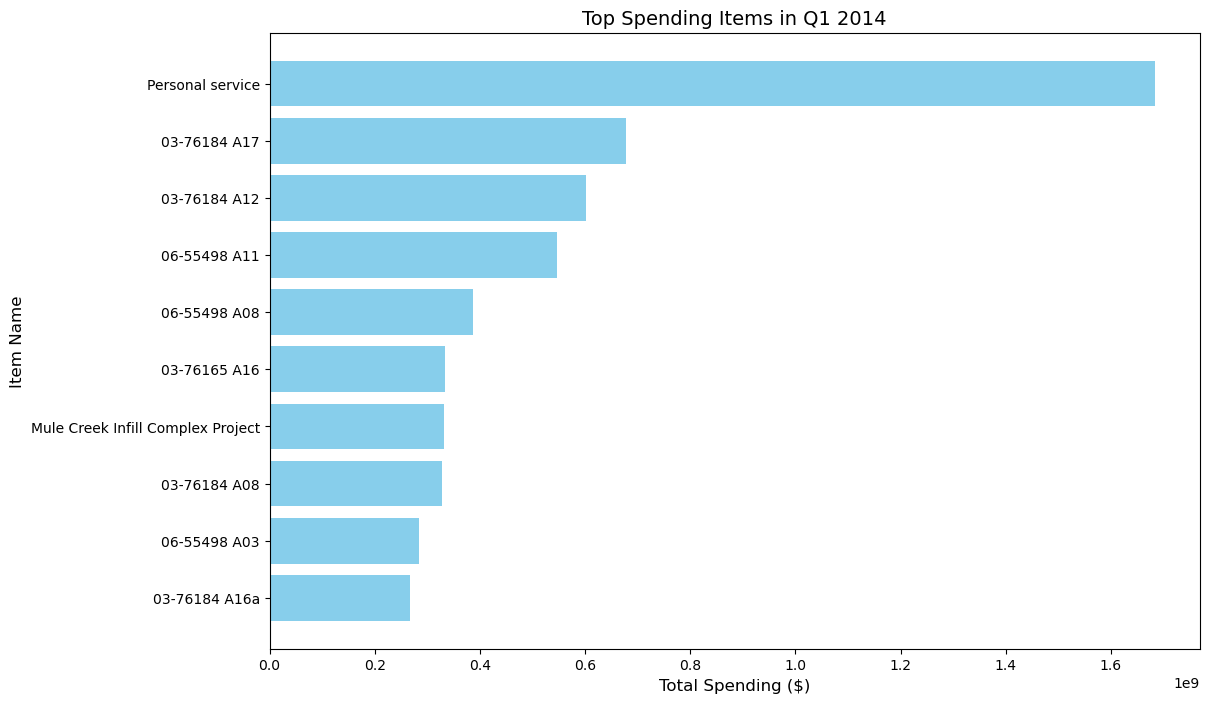

In [316]:
# استعلام بيانات الربع الأول من 2014
data_q1_2014 = get_top_spending_items_for_quarter(2014, 1, top_n=10)

# رسم البيانات
plot_top_spending_items(data_q1_2014, 2014, 1)


In [322]:
# Check raw data
for item in data_q1_2014:
    print(item)


{'_id': 'Personal service', 'total_spending': 1684172034.0}
{'_id': '03-76184 A17', 'total_spending': 677942000.0}
{'_id': '03-76184 A12', 'total_spending': 601754000.0}
{'_id': '06-55498 A11', 'total_spending': 545763000.0}
{'_id': '06-55498 A08', 'total_spending': 387411000.0}
{'_id': '03-76165 A16', 'total_spending': 334112000.0}
{'_id': 'Mule Creek Infill Complex Project', 'total_spending': 330965400.0}
{'_id': '03-76184 A08', 'total_spending': 328175000.0}
{'_id': '06-55498 A03', 'total_spending': 283316000.0}
{'_id': '03-76184 A16a', 'total_spending': 266484000.0}
